In [25]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [26]:
#  Create the Quadratic State
class QuadraticState(TypedDict):

    a: int
    b: int
    c: int

    eqn: str
    discriminant: float
    result: str
    root1: float
    root2: float
    

In [27]:
# Create a function to show the equation
def show_equation(state: QuadraticState):

    eqn = f'{state['a']}x**2 + {state['b']}x + {state['c']}'
    # print(eqn)
    return {'eqn' : eqn}  


In [28]:
# Create a function to calculate discriminant 

def calculate_discriminant(state: QuadraticState):
    
    dis = state['b']**2 - (4*state['a']*state['c'])

    return {'discriminant': dis}

In [29]:
#  Create a function to tell no real roots 

def no_real_roots(state: QuadraticState):

    no_real = f"No real roots are present!"

    return {'result' : no_real}

In [30]:
# Create a function to calculate two distinct real roots 

def real_roots(state: QuadraticState):

    real = "Yes, there are two real and distinct roots!"
    root1 =  (-state['b'] + (state['discriminant'])**0.5)/2*state['a']

    root2 = (-state['b'] - (state['discriminant'])**0.5)/2*state['a']

    return {'result': real, 'root1' : root1, 'root2':root2}

In [31]:
# Create a function to calculate repeated roots 

def repeated_roots(state: QuadraticState):

    real = "Yes, there are real and equal roots!"

    root = (-state['b']/2*state['a'])

    return {'result': real, 'root1' : root, 'root2':root}

In [32]:
def check_condition(state: QuadraticState) -> Literal["no_real_roots", "real_roots", "repeated_roots"]:

    if state['discriminant'] > 0:
        return "real_roots"
    elif state['discriminant'] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"

In [33]:
# create graph
graph = StateGraph(QuadraticState)

# Add Nodes
graph.add_node('show_equation', show_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)
graph.add_node('no_real_roots', no_real_roots)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_roots', repeated_roots)

# Add Edges
graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')
graph.add_conditional_edges('calculate_discriminant', check_condition)
# No need for these 
# graph.add_conditional_edges('calculate_discriminant','real_roots')
# graph.add_conditional_edges('calculate_discriminant', 'repeated_roots')
graph.add_edge('no_real_roots', END)
graph.add_edge('real_roots', END)
graph.add_edge('repeated_roots', END)

# Compile
workflow = graph.compile()

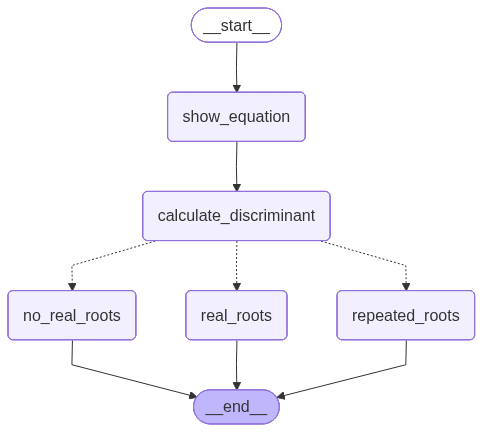

In [34]:
workflow

In [35]:
initial_state = {
    'a': 1,
    'b': 5,
    'c': -14
}

workflow.invoke(initial_state)

{'a': 1,
 'b': 5,
 'c': -14,
 'eqn': '1x**2 + 5x + -14',
 'discriminant': 81,
 'result': 'Yes, there are two real and distinct roots!',
 'root1': 2.0,
 'root2': -7.0}